In [2]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

#### Load data

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

11493376/11490434 [==============================] - 2s 0us/step
Number of original training examples: 60000
Number of original test examples: 10000


In [4]:
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train_), (x_test, y_test_) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train_, num_classes)
y_test = keras.utils.to_categorical(y_test_, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
INPUT_SHAPE = (28,28,1)
NUM_CLASSES = 10

class CNN(keras.Model):

    def __init__(self):
        super(CNN, self).__init__()
        self.model = keras.models.Sequential()
        self.model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='Same', activation='relu',
                                      input_shape = INPUT_SHAPE) )
        self.model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
        self.model.add(keras.layers.Conv2D(filters=64,kernel_size=(3, 3),strides=1,padding='same', activation='relu'))
        self.model.add(keras.layers.MaxPool2D(pool_size=(2, 2),padding='same'))
        self.model.add(keras.layers.Flatten())
        self.model.add(keras.layers.Dense(units=NUM_CLASSES, activation='sigmoid'))

    def call(self, inputs):
        return self.model(inputs)

class CNN_Drop(keras.Model):

    def __init__(self):
        super(CNN_Drop, self).__init__()
        self.model = keras.models.Sequential()
        self.model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='Same', activation='relu',
                                      input_shape = INPUT_SHAPE) )
        self.model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
        self.model.add(keras.layers.Conv2D(filters=64,kernel_size=(3, 3),strides=1,padding='same', activation='relu'))
        self.model.add(keras.layers.MaxPool2D(pool_size=(2, 2),padding='same'))
        self.model.add(keras.layers.Flatten())
        self.model.add(keras.layers.Dropout(0.5))
        self.model.add(keras.layers.Dense(units=NUM_CLASSES, activation='sigmoid'))

    def call(self, inputs):
        return self.model(inputs)

class CNN_BN(keras.Model):

    def __init__(self):
        super(CNN_BN, self).__init__()
        self.model = keras.models.Sequential()
        self.model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='Same', input_shape = INPUT_SHAPE) )
        self.model.add(keras.layers.BatchNormalization())
        self.model.add(keras.layers.ReLU())
        self.model.add(keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'))
        
        self.model.add(keras.layers.Conv2D(filters=64,kernel_size=(3, 3),strides=1,padding='same'))
        self.model.add(keras.layers.BatchNormalization())
        self.model.add(keras.layers.ReLU())
        self.model.add(keras.layers.MaxPool2D(pool_size=(2, 2),padding='same'))
        
        self.model.add(keras.layers.Flatten())
        self.model.add(keras.layers.Dense(units=NUM_CLASSES, activation='sigmoid'))

    def call(self, inputs):
        return self.model(inputs)


#### CNN Model

In [6]:
epochs = 20
batch_size = 128
cnn = CNN()
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

CNN_history = cnn.fit(x_train[:3000], y_train[:3000], batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
22/22 [==============================] - 1s 65ms/step - loss: 1.9397 - accuracy: 0.4926 - val_loss: 1.0134 - val_accuracy: 0.7567
Epoch 2/20
22/22 [==============================] - 1s 53ms/step - loss: 0.6911 - accuracy: 0.8000 - val_loss: 0.4827 - val_accuracy: 0.8333
Epoch 3/20
22/22 [==============================] - 1s 49ms/step - loss: 0.4385 - accuracy: 0.8737 - val_loss: 0.3885 - val_accuracy: 0.8667
Epoch 4/20
22/22 [==============================] - 1s 46ms/step - loss: 0.3415 - accuracy: 0.9070 - val_loss: 0.3120 - val_accuracy: 0.8933
Epoch 5/20
22/22 [==============================] - 1s 47ms/step - loss: 0.2867 - accuracy: 0.9178 - val_loss: 0.2712 - val_accuracy: 0.9200
Epoch 6/20
22/22 [==============================] - 1s 48ms/step - loss: 0.2301 - accuracy: 0.9356 - val_loss: 0.2423 - val_accuracy: 0.9167
Epoch 7/20
22/22 [==============================] - 1s 50ms/step - loss: 0.1992 - accuracy: 0.9433 - val_loss: 0.2478 - val_accuracy: 0.9367
Epoch 8/20
22

In [7]:
score = cnn.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.12051232904195786
Test accuracy: 0.9617999792098999


In [8]:
cnn.save_weights("ckpt_CNN")

In [9]:
new_cnn = CNN()
new_cnn.load_weights("ckpt_CNN")
cnn.evaluate(x_test, y_test, verbose=0)

[0.12051232904195786, 0.9617999792098999]

#### CNN_Drop

In [10]:
epochs = 20
batch_size = 264
cnn_drop = CNN_Drop()
cnn_drop.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

CNN_drop_history = cnn_drop.fit(x_train[:3000], y_train[:3000], batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
11/11 [==============================] - 1s 120ms/step - loss: 2.2214 - accuracy: 0.3081 - val_loss: 2.0139 - val_accuracy: 0.5900
Epoch 2/20
11/11 [==============================] - 1s 109ms/step - loss: 1.6639 - accuracy: 0.6289 - val_loss: 0.9514 - val_accuracy: 0.7433
Epoch 3/20
11/11 [==============================] - 1s 119ms/step - loss: 0.8948 - accuracy: 0.7178 - val_loss: 0.6078 - val_accuracy: 0.8000
Epoch 4/20
11/11 [==============================] - 1s 100ms/step - loss: 0.6887 - accuracy: 0.7744 - val_loss: 0.5010 - val_accuracy: 0.8400
Epoch 5/20
11/11 [==============================] - 1s 110ms/step - loss: 0.5469 - accuracy: 0.8252 - val_loss: 0.4036 - val_accuracy: 0.8767
Epoch 6/20
11/11 [==============================] - 1s 127ms/step - loss: 0.4620 - accuracy: 0.8552 - val_loss: 0.3777 - val_accuracy: 0.8800
Epoch 7/20
11/11 [==============================] - 1s 114ms/step - loss: 0.4115 - accuracy: 0.8752 - val_loss: 0.3285 - val_accuracy: 0.9000
Epoch 

In [11]:
score = cnn_drop.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.13938485085964203
Test accuracy: 0.958899974822998


In [12]:
cnn_drop.save_weights("ckpt_CNN_Drop")

#### CNN_BN

In [13]:
epochs = 20
batch_size = 128
cnn_bn = CNN_BN()
cnn_bn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

CNN_BN_history = cnn_bn.fit(x_train[:3000], y_train[:3000], batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
22/22 [==============================] - 2s 111ms/step - loss: 1.8353 - accuracy: 0.1915 - val_loss: 2.1359 - val_accuracy: 0.1700
Epoch 2/20
22/22 [==============================] - 2s 82ms/step - loss: 0.8173 - accuracy: 0.6059 - val_loss: 2.0226 - val_accuracy: 0.3433
Epoch 3/20
22/22 [==============================] - 2s 87ms/step - loss: 0.2050 - accuracy: 0.9456 - val_loss: 2.0510 - val_accuracy: 0.2367
Epoch 4/20
22/22 [==============================] - 2s 77ms/step - loss: 0.1196 - accuracy: 0.9674 - val_loss: 2.1003 - val_accuracy: 0.2600
Epoch 5/20
22/22 [==============================] - 2s 92ms/step - loss: 0.0874 - accuracy: 0.9770 - val_loss: 2.0687 - val_accuracy: 0.2533
Epoch 6/20
22/22 [==============================] - 2s 75ms/step - loss: 0.0552 - accuracy: 0.9896 - val_loss: 2.0881 - val_accuracy: 0.2367
Epoch 7/20
22/22 [==============================] - 2s 74ms/step - loss: 0.0389 - accuracy: 0.9922 - val_loss: 2.0344 - val_accuracy: 0.2400
Epoch 8/20
2

In [14]:
score = cnn_bn.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.28660380840301514
Test accuracy: 0.9229999780654907


In [21]:
cnn_bn.save_weights("ckpt_CNN_BN")

In [44]:
np.argmax(cnn_bn.predict(x_test[:3]), axis=1)

array([7, 2, 1])

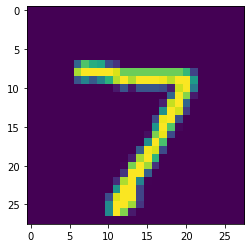

In [40]:
plt.imshow(x_test[0])

#### Comparison

Plot

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_losses(histories, titles,):
    n = len(histories)
    fig, axes = plt.subplots(1,n, figsize = (n*6,4))
    if n == 1:
        axes = [axes]

    for i in range(n):
        train_loss = histories[i].history['loss']
        val_loss = histories[i].history['val_loss']
        x = np.arange(len(train_loss),)
        axes[i].plot(x, train_loss,color='blue', label = 'Train loss')
        axes[i].plot(x, val_loss,color='red', label = 'Validation loss')
        axes[i].set_xlabel('Epoch')
        axes[i].set_ylabel('Loss')
        axes[i].set_title(titles[i])
        axes[i].legend()
        axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.show()

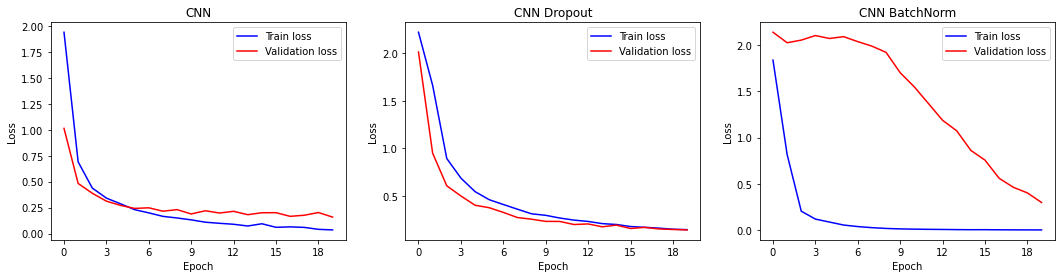

In [16]:
plot_losses([CNN_history, CNN_drop_history, CNN_BN_history ], ['CNN', 'CNN Dropout', 'CNN BatchNorm'])
# plot_losses([CNN_history], ['CNN'])

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_accuracy(histories, titles,):
    n = len(histories)
    fig, axes = plt.subplots(1,n, figsize = (n*6,4))
    if n == 1:
        axes = [axes]

    for i in range(n):
        train_loss = histories[i].history['accuracy']
        val_loss = histories[i].history['val_accuracy']
        x = np.arange(len(train_loss),)
        axes[i].plot(x, train_loss, color='blue', label = 'Train accuracy')
        axes[i].plot(x, val_loss, color ='red', label = 'Validation accuracy')
        axes[i].set_xlabel('Epoch')
        axes[i].set_ylabel('Loss')
        axes[i].set_title(titles[i])
        axes[i].legend()
        axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.show()

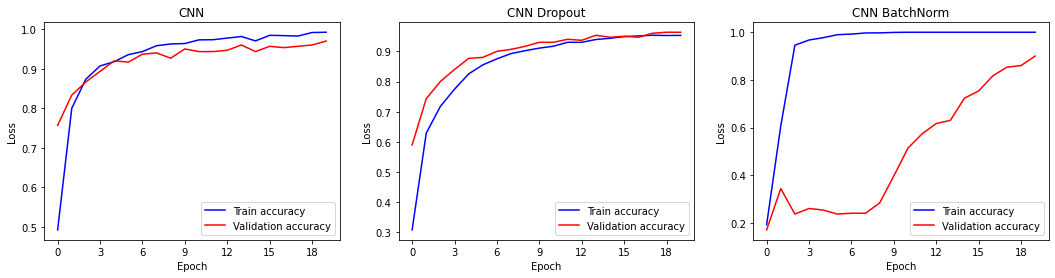

In [18]:
plot_accuracy([CNN_history, CNN_drop_history, CNN_BN_history], ['CNN', 'CNN Dropout', 'CNN BatchNorm'])
# plot_accuracy([CNN_history], ['CNN'])

In [28]:
def show_images(x,y, num):
    if num % 2 == 1:
        num += 1
    
    images = x_train.squeeze()[:num]
    labels = y_train_.squeeze()[:num]
    num_row = 2
    num_col = num // 2

    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray_r', )
        ax.set_title('Label: {}'.format(labels[i]))

    plt.tight_layout()
    plt.show()

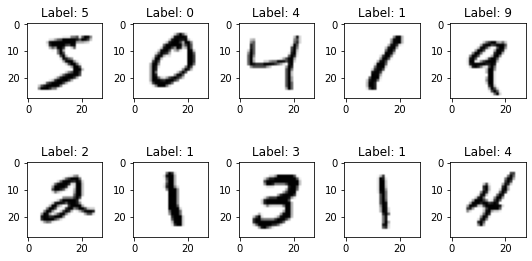

In [37]:
show_images(x_test, y_test, 10)